In [1]:
OPENSLIDE_PATH = r"C:\openslide-bin-4.0.0.6-windows-x64\bin"

import os
if hasattr(os, 'add_dll_directory'):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
# 1. Load the .svs Image and Select Lowest Resolution Level
def load_lowest_resolution_image(svs_path):
    slide = openslide.OpenSlide(svs_path)
    
    # Print available levels and their dimensions
    print("Available levels and dimensions:")
    for i, dim in enumerate(slide.level_dimensions):
        print(f"Level {i}: {dim}")
    
    # Select the lowest resolution (last level)
    lowest_res_level = slide.level_count - 1
    low_res_image = np.array(slide.read_region((0, 0), lowest_res_level, slide.level_dimensions[lowest_res_level]))[:, :, :3]
    
    print(f"\nUsing Level {lowest_res_level} with dimensions: {slide.level_dimensions[lowest_res_level]}")
    return low_res_image


In [3]:
# 2. Plot Histograms for Intensity
def plot_histograms(image, title="Image Histograms"):
    r, g, b = cv2.split(image)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.7)
    plt.title("Red Channel")

    plt.subplot(1, 3, 2)
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.7)
    plt.title("Green Channel")

    plt.subplot(1, 3, 3)
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title("Blue Channel")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [4]:
# 3. Analyze Histogram and Select Optimal Threshold
def select_optimal_threshold(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
    # Visualize the histogram
    plt.plot(hist, color='gray')
    plt.title("Gray-Level Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

    # Find optimal threshold using Otsu's method
    _, threshold_value = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"Optimal threshold selected (Otsu's method): {threshold_value}")
    return threshold_value


In [5]:
# 4. Analyze Smoothing Sigma Using Histogram
def analyze_smoothing_sigma(image, threshold_value):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sigma_values = [0.5, 1, 2, 3, 4]
    
    plt.figure(figsize=(15, 8))
    for i, sigma in enumerate(sigma_values):
        # Apply Gaussian smoothing
        smoothed = cv2.GaussianBlur(gray_image, (0, 0), sigma)

        # Apply threshold
        _, binary_mask = cv2.threshold(smoothed, threshold_value, 255, cv2.THRESH_BINARY)

        # Plot the smoothed binary mask
        plt.subplot(2, len(sigma_values), i + 1)
        plt.imshow(binary_mask, cmap='gray')
        plt.title(f"Sigma = {sigma}")
        plt.axis('off')

        # Plot histogram for the smoothed image
        plt.subplot(2, len(sigma_values), len(sigma_values) + i + 1)
        plt.hist(smoothed.ravel(), bins=256, color='gray', alpha=0.7)
        plt.title(f"Histogram (Sigma = {sigma})")

    plt.tight_layout()
    plt.show()

    # Select the "best" sigma where noise is reduced but structure is preserved
    optimal_sigma = 1.0  # You can adjust this based on visual analysis
    print(f"Optimal smoothing sigma selected: {optimal_sigma}")
    return optimal_sigma


In [6]:
# 5. Main Workflow
def main():
    svs_path = r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\WSI 1.svs"  
    
    # Step 1: Load the image at the lowest resolution
    image = load_lowest_resolution_image(svs_path)
    
    # Step 2: Plot histograms for intensity
    print("\nStep 2: Plotting histograms...")
    plot_histograms(image, title="Histograms at Lowest Resolution")
    
    # Step 3: Select optimal threshold
    print("\nStep 3: Selecting optimal threshold...")
    threshold_value = select_optimal_threshold(image)
    
    # Step 4: Analyze smoothing sigma
    print("\nStep 4: Analyzing smoothing sigma...")
    optimal_sigma = analyze_smoothing_sigma(image, threshold_value)
    
    # Step 5: Print Results
    print("\nFinal Results:")
    print(f"Optimal Threshold Value: {threshold_value}")
    print(f"Optimal Smoothing Sigma: {optimal_sigma}")


Available levels and dimensions:
Level 0: (87647, 52434)
Level 1: (21911, 13108)
Level 2: (5477, 3277)
Level 3: (2738, 1638)

Using Level 3 with dimensions: (2738, 1638)

Step 2: Plotting histograms...


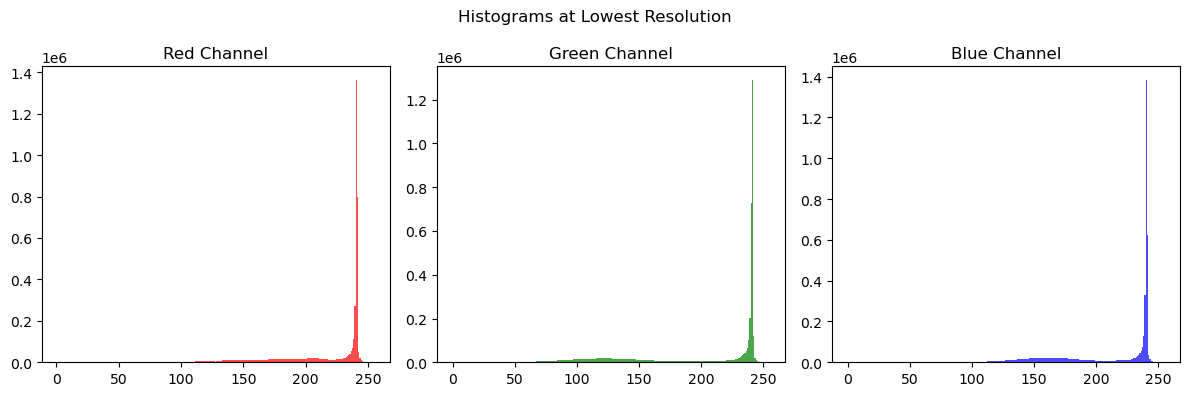


Step 3: Selecting optimal threshold...


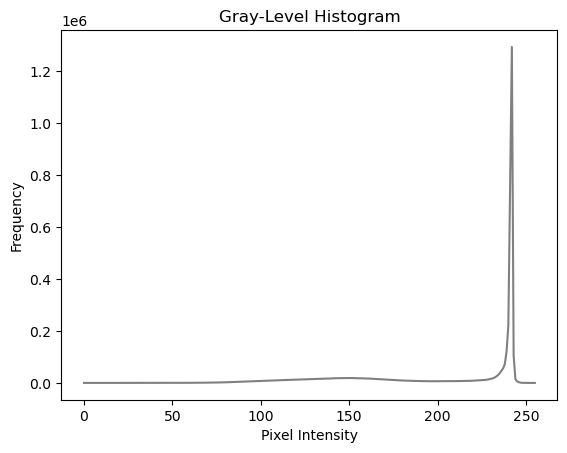

Optimal threshold selected (Otsu's method): [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

Step 4: Analyzing smoothing sigma...


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'threshold'
> Overload resolution failed:
>  - Argument 'thresh' can not be treated as a double
>  - Argument 'thresh' can not be treated as a double


<Figure size 1500x800 with 0 Axes>

In [7]:

# Run the analysis
if __name__ == "__main__":
    main()